# 1.1 夏普比率 (Sharpe Ratio)

## 概念介绍

夏普比率是由诺贝尔经济学奖获得者威廉·夏普(William F. Sharpe)于1966年提出的，用于衡量投资组合的风险调整收益率。该比率计算超额收益与收益标准差之比，用于评估单位风险下的收益表现。

### 夏普比率公式

$Sharpe\ Ratio = \frac{R_p - R_f}{\sigma_p}$

其中：
- $R_p$ 是投资组合的期望收益率
- $R_f$ 是无风险收益率
- $\sigma_p$ 是投资组合收益率的标准差（波动率）

夏普比率越高，表示投资组合在单位风险下的收益越好。通常，夏普比率大于1被认为是良好的风险回报特征。

## 1.1 安装必要的库

首先安装需要用到的Python库

In [6]:
# 安装必要的库
!pip install pandas numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


## 1.2 从Github加载数据


In [7]:
!wget -O AAPL_data.csv "https://github.com/Newzil-git/Financial-Risk-Management/blob/update-repo/FR%20Code/Part%201/AAPL_data.csv"
!wget -O SPY_data.csv "https://github.com/Newzil-git/Financial-Risk-Management/blob/update-repo/FR%20Code/Part%201/SPY_data.csv"
file_path_aapl = "AAPL_data.csv"
file_path_spy = "SPY_data.csv"

'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


## 1.3 导入必要的库

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

## 1.4 数据加载和预处理

In [9]:
# 设定无风险收益率
risk_free_rate = 0.02  # 假设年化无风险利率为2%

# 读取 CSV 并跳过前两行
column_names = ["Date", "Open", "High", "Low", "Close", "Volume"]

try:
    data_aapl = pd.read_csv(file_path_aapl, skiprows=3, names=column_names)
    data_spy = pd.read_csv(file_path_spy, skiprows=3, names=column_names)
    print("数据加载成功")
except Exception as e:
    print(f"数据加载失败: {e}")
    # 如果加载失败，尝试不跳过行读取
    try:
        data_aapl = pd.read_csv(file_path_aapl)
        data_spy = pd.read_csv(file_path_spy)
        print("重新尝试数据加载成功")
    except Exception as e:
        print(f"数据加载再次失败: {e}")

数据加载成功


In [10]:
# 数据预览
print("AAPL数据预览:")
display(data_aapl.head())
print("\nSPY数据预览:")
display(data_spy.head())

AAPL数据预览:


,Date,Open,High,Low,Close,Volume
0,2022/1/3,179.076584,179.932572,174.845898,174.963959,104487900
1,2022/1/4,176.803787,179.991574,176.233133,179.686573,99310400
2,2022/1/5,172.100876,177.266264,171.825390,176.715291,94537600
3,2022/1/6,169.227890,172.474707,168.873692,169.916605,96904000
4,2022/1/7,169.395187,171.333439,168.273561,170.103585,86709100



SPY数据预览:


,Date,Open,High,Low,Close,Volume
0,2022-01-03,457.181580,457.315577,453.487468,455.832167,72668200
1,2022-01-04,457.028381,459.353980,455.143036,458.626630,71178700
2,2022-01-05,448.252594,457.440065,448.156885,456.655295,104538900
3,2022-01-06,447.831451,450.587695,445.429303,447.783612,86858900
4,2022-01-07,446.061005,449.037376,444.682883,447.841091,85111600


In [11]:
# 统一列名（将 "Close" 重命名为 "Adj Close"）
data_aapl.rename(columns={'Close': 'Adj Close'}, inplace=True)
data_spy.rename(columns={'Close': 'Adj Close'}, inplace=True)

# 转换日期格式并设置索引
try:
    data_aapl['Date'] = pd.to_datetime(data_aapl['Date'], format="%Y/%m/%d")
except Exception as e:
    print(f"AAPL日期转换错误，尝试自动检测格式: {e}")
    data_aapl['Date'] = pd.to_datetime(data_aapl['Date'])

try:    
    data_spy['Date'] = pd.to_datetime(data_spy['Date'], format="%Y/%m/%d")
except Exception as e:
    print(f"SPY日期转换错误，尝试自动检测格式: {e}")
    data_spy['Date'] = pd.to_datetime(data_spy['Date'])

data_aapl.set_index('Date', inplace=True)
data_spy.set_index('Date', inplace=True)

# 数据基本统计量
print("\nAAPL数据基本统计量:")
display(data_aapl.describe())
print("\nSPY数据基本统计量:")
display(data_spy.describe())


AAPL数据基本统计量:


,Open,High,Low,Adj Close,Volume
count,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,176.989600,178.671616,175.103761,176.797993,6.808211e+07
std,29.641833,29.567221,29.590916,29.574191,2.838205e+07
min,123.718971,126.440353,122.877820,124.698692,2.323470e+07
25%,154.242844,155.919018,151.985868,153.690587,4.871410e+07
50%,172.123108,173.133531,170.370846,171.827252,6.219900e+07
75%,190.626129,192.135967,189.481959,190.549551,8.054620e+07
max,259.019989,260.100006,257.630005,258.190002,3.186799e+08



SPY数据基本统计量:


,Open,High,Low,Adj Close,Volume
count,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,449.965539,452.542823,447.053563,449.901891,7.799959e+07
std,69.797059,69.490262,70.074548,69.876543,2.966345e+07
min,345.188599,348.344640,337.008097,338.073022,2.690660e+07
25%,395.318695,398.160048,392.224420,394.499106,5.915580e+07
50%,429.054504,431.260152,426.282338,429.014679,7.454810e+07
75%,506.383087,510.532839,504.390010,507.234849,9.225830e+07
max,605.771179,607.026962,604.983851,605.651585,2.517839e+08


In [12]:
# 计算每日收益率
data_aapl['Daily Return'] = data_aapl['Adj Close'].pct_change()
data_spy['Daily Return'] = data_spy['Adj Close'].pct_change()

# 查看收益率
print("AAPL日收益率:")
display(data_aapl['Daily Return'].head())
print("\nSPY日收益率:")
display(data_spy['Daily Return'].head())

AAPL日收益率:


Date
2022-01-03         NaN
2022-01-04    0.026992
2022-01-05   -0.016536
2022-01-06   -0.038473
2022-01-07    0.001100
Name: Daily Return, dtype: float64


SPY日收益率:


Date
2022-01-03         NaN
2022-01-04    0.006130
2022-01-05   -0.004298
2022-01-06   -0.019428
2022-01-07    0.000128
Name: Daily Return, dtype: float64

## 1.5 计算夏普比率

In [13]:
# 定义夏普比率计算函数
def calculate_sharpe_ratio(data, risk_free_rate=0.02):
    """计算夏普比率
    
    参数:
        data: 包含'Daily Return'列的DataFrame
        risk_free_rate: 年化无风险收益率，默认为2%
        
    返回:
        sharpe_ratio: 夏普比率
        annual_return: 年化收益率
        annual_std: 年化标准差
    """
    avg_daily_return = data['Daily Return'].mean()
    std_daily_return = data['Daily Return'].std()

    # 年化收益率和标准差
    annual_return = avg_daily_return * 252  # 假设一年有252个交易日
    annual_std = std_daily_return * np.sqrt(252)

    # 计算夏普比率
    sharpe_ratio = (annual_return - risk_free_rate) / annual_std
    return sharpe_ratio, annual_return, annual_std

In [14]:
# 计算 AAPL 和 SPY 的夏普比率
sharpe_aapl, return_aapl, std_aapl = calculate_sharpe_ratio(data_aapl)
sharpe_spy, return_spy, std_spy = calculate_sharpe_ratio(data_spy)

# 打印计算结果
print(f"AAPL 夏普比率: {sharpe_aapl:.2f}, 年化收益率: {return_aapl:.2%}, 年化标准差: {std_aapl:.2%}")
print(f"SPY 夏普比率: {sharpe_spy:.2f}, 年化收益率: {return_spy:.2%}, 年化标准差: {std_spy:.2%}")

AAPL 夏普比率: 0.51, 年化收益率: 16.22%, 年化标准差: 28.03%
SPY 夏普比率: 0.47, 年化收益率: 10.19%, 年化标准差: 17.57%


## 1.6 结果可视化

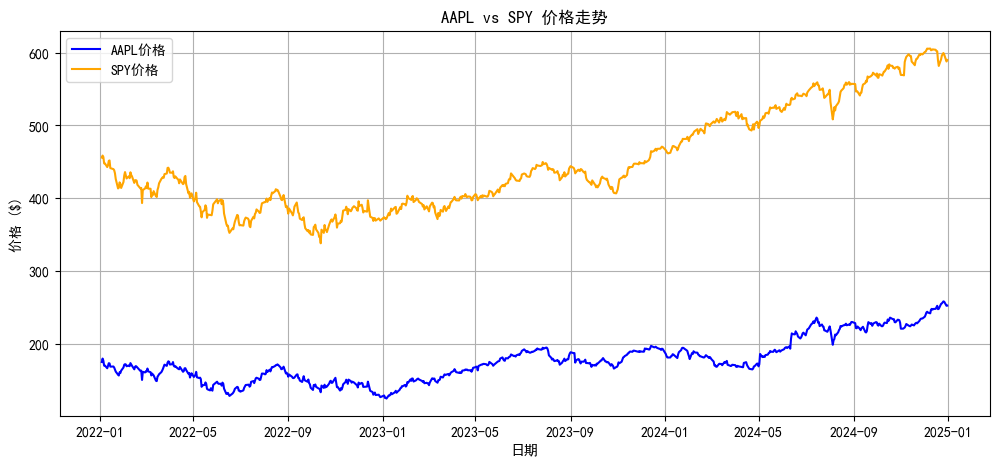

In [15]:
# 1. 价格走势图
plt.figure(figsize=(12, 5))
plt.plot(data_aapl.index, data_aapl['Adj Close'], label="AAPL价格", color='blue')
plt.plot(data_spy.index, data_spy['Adj Close'], label="SPY价格", color='orange')
plt.title("AAPL vs SPY 价格走势")
plt.xlabel("日期")
plt.ylabel("价格 ($)")
plt.legend()
plt.grid(True)
plt.show()

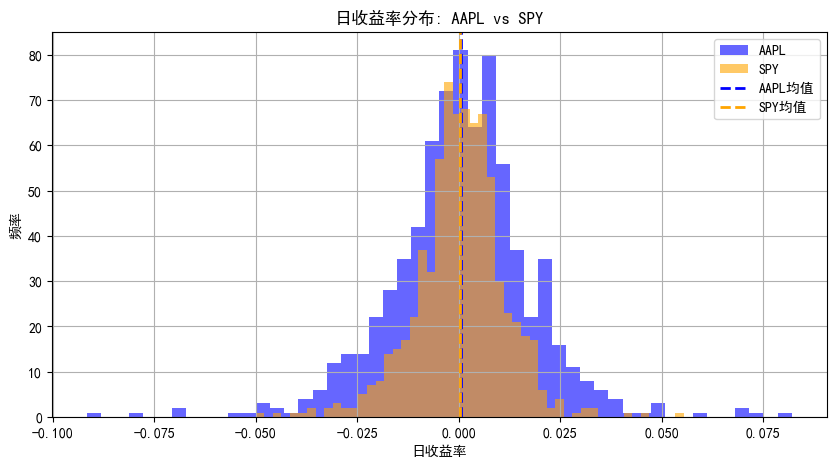

In [16]:
# 2. 收益率分布图
plt.figure(figsize=(10, 5))
plt.hist(data_aapl['Daily Return'].dropna(), bins=50, alpha=0.6, label="AAPL", color='blue')
plt.hist(data_spy['Daily Return'].dropna(), bins=50, alpha=0.6, label="SPY", color='orange')
plt.axvline(data_aapl['Daily Return'].mean(), color='blue', linestyle='dashed', linewidth=2, label="AAPL均值")
plt.axvline(data_spy['Daily Return'].mean(), color='orange', linestyle='dashed', linewidth=2, label="SPY均值")
plt.title("日收益率分布: AAPL vs SPY")
plt.xlabel("日收益率")
plt.ylabel("频率")
plt.legend()
plt.grid(True)
plt.show()

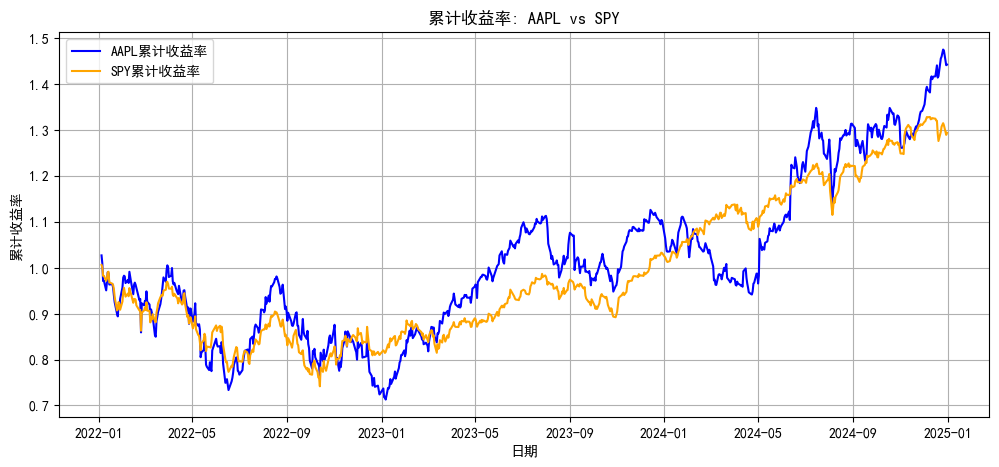

In [17]:
# 3. 累计收益率图
data_aapl['Cumulative Return'] = (1 + data_aapl['Daily Return']).cumprod()
data_spy['Cumulative Return'] = (1 + data_spy['Daily Return']).cumprod()

plt.figure(figsize=(12, 5))
plt.plot(data_aapl.index, data_aapl['Cumulative Return'], label="AAPL累计收益率", color='blue')
plt.plot(data_spy.index, data_spy['Cumulative Return'], label="SPY累计收益率", color='orange')
plt.title("累计收益率: AAPL vs SPY")
plt.xlabel("日期")
plt.ylabel("累计收益率")
plt.legend()
plt.grid(True)
plt.show()

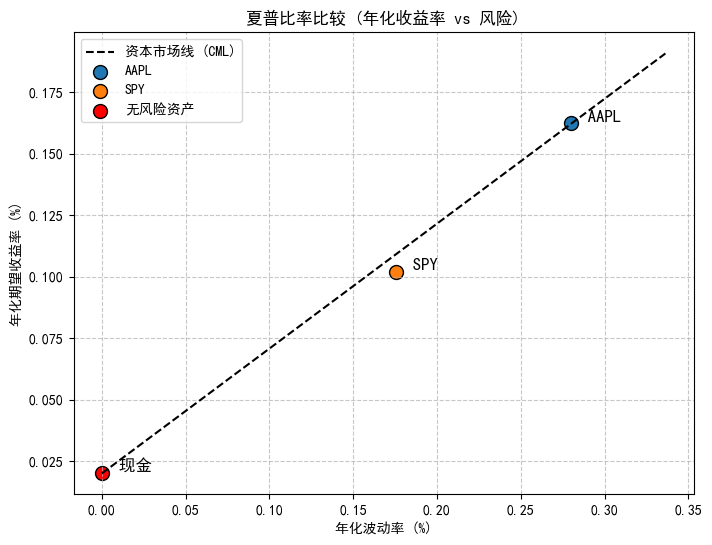

In [18]:
# 4. 夏普比率可视化 - 资本市场线
# 资产数据
assets = ['AAPL', 'SPY']
annual_volatilities = [std_aapl, std_spy]  # 年波动率 (X 轴)
annual_returns = [return_aapl, return_spy]  # 年期望收益率 (Y 轴)

# 计算夏普比率斜率
sharpe_ratios = [(r - risk_free_rate) / s for r, s in zip(annual_returns, annual_volatilities)]

# 创建图形
plt.figure(figsize=(8, 6))

# 绘制资本市场线 (CML)，从无风险收益率开始
x_values = np.linspace(0, max(annual_volatilities) * 1.2, 100)
y_values = risk_free_rate + sharpe_aapl * x_values  # 使用 AAPL 的夏普比率画斜率
plt.plot(x_values, y_values, linestyle="--", color="black", label="资本市场线 (CML)")

# 绘制 AAPL 和 SPY 的点
for i, asset in enumerate(assets):
    plt.scatter(annual_volatilities[i], annual_returns[i], s=100, label=asset, edgecolors='black')
    plt.text(annual_volatilities[i], annual_returns[i], f"  {asset}", fontsize=12, verticalalignment='bottom', horizontalalignment='left')

# 绘制无风险资产（现金）的点
plt.scatter(0, risk_free_rate, color='red', s=100, label="无风险资产", edgecolors='black')
plt.text(0, risk_free_rate, "  现金", fontsize=12, verticalalignment='bottom', horizontalalignment='left')

# 设置图表标题和标签
plt.title("夏普比率比较 (年化收益率 vs 风险)")
plt.xlabel("年化波动率 (%)")
plt.ylabel("年化期望收益率 (%)")

# 添加图例和网格
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 展示图表
plt.show()

## 1.7 结果分析与解释

通过上述计算和可视化，我们可以得出以下结论：

1. **夏普比率比较**：
   - AAPL夏普比率：显示了苹果公司在风险调整后的收益表现
   - SPY夏普比率：反映了标普500指数的风险调整收益
   - 两者的对比可以判断哪个投资在单位风险下提供了更好的收益

2. **价格走势分析**：
   - 通过价格走势图，我们可以直观地看到AAPL和SPY在研究期间的价格变动情况
   - 价格走势反映了市场对这两种资产的估值变化

3. **收益率分布特征**：
   - 收益率分布直方图展示了每日收益率的频率分布
   - 通过比较两个分布的形状、集中趋势和离散程度，我们可以判断两种资产的风险特征

4. **累计收益率表现**：
   - 累计收益率图展示了长期持有这两种资产的收益表现
   - 这个指标对长期投资者特别重要

5. **资本市场线分析**：
   - 资本市场线(CML)展示了风险与收益的理论关系
   - 投资者可以根据自己的风险偏好，在这条线上选择适合的投资组合